## Literature search

To be able to reproduce the results of my web search for articles for my systematic review, I used the code below.

We use PubMed for the search.

In [1]:
from pymed import PubMed
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
pubmed = PubMed(tool="MyTool", email="allen@dkfz-heidelberg.de")

def figurePanelDefaultSize():
    """
    Use to keep the size of panels similar across figures
    """
    return (1.8,1.8)

def setFigureDefaultParameters():
    matplotlib.rcdefaults()
    plt.rc('axes', labelsize=10) #fontsize of the title
    plt.rc('axes', titlesize=10) #fontsize of the title
    plt.rc('axes', linewidth=1.25) 
    plt.rc("xtick.major", width=1.25)
    plt.rc("ytick.major", width=1.25)

This is just an example of how we can retrieve articles from a database search. Not part of the review.

In [2]:
def results_to_dict(results):
    articleList = []
    for article in results:
        articleDict = article.toDict()
        articleList.append(articleDict)
    return articleList

We build a list of queries and then loop through them to retrieve our paper of interests.

We can do separate searches instead of combining many together. This gives data to identify the popular terms.

Put the publication date filter at the end.

In [3]:
startDate="2019/01/01"
endDate="2024/04/01"
dateFilter = f"(\"{startDate}\"[Date - Publication] : \"{endDate}\"[Date - Publication])"
dateFilter

'("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])'

In [4]:
queryList = [# queries with explainable AI and human-AI interactions, without reference to cancer
             #"(human-AI interactions) AND (explainable AI)", # used for introduction
             #"(human-centered AI) AND (explainable AI)", # used for introduction
             #"(human-machine interactions) AND (explainable AI)", # used for introduction
             
             # used for systematic review

             # queries with human-AI interactions and cancer
             "(human-AI interaction) AND ((oncology) OR (cancer))",
             "(human-centered AI) AND ((oncology) OR (cancer))",
             "(human-machine interaction) AND ((oncology) OR (cancer))",
            
             # queries with explainable AI and 3 specific areas of oncology, otherwise we get too many results
             "(explainable AI) AND (cancer radiology)",
             "(explainable AI) AND (skin cancer)",
             "(explainable AI) AND (melanoma)"]

In [5]:
queryList = [ q+f" AND {dateFilter}"for q in queryList]

In [6]:
queryList

['(human-AI interaction) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-centered AI) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-machine interaction) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(explainable AI) AND (cancer radiology) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(explainable AI) AND (skin cancer) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(explainable AI) AND (melanoma) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])']

Add a second set of queries to estimate the number of studies that test how AI improves the oncologist.

In [7]:
queryList2 = ["(deep learning) AND (melanoma) AND (diagnostic) AND (\"2019/01/01\"[Date - Publication] : \"2019/12/31\"[Date - Publication])",
              "(deep learning) AND (melanoma) AND (diagnostic) AND (\"2023/01/01\"[Date - Publication] : \"2023/12/31\"[Date - Publication])"]

Create a nice representation of the query for plotting.

In [8]:
def format_query(q):
    q = q.split("AND")[:-1]
    q = [str.strip() for str in q]
    q = [str.replace("(","") for str in q]
    q = [str.replace(")","") for str in q]
    q = " AND ".join(q)
    q = q[0].upper() + q[1:]
    return q

In [9]:
dfQueries= pd.DataFrame({"query": queryList,
                         "queryFormatted": [ format_query(q) for q in queryList],
                         "queryNo": np.arange(len(queryList))})

In [10]:
dfQueries


,query,queryFormatted,queryNo
0,(human-AI interaction) AND ((oncology) OR (can...,Human-AI interaction AND oncology OR cancer,0
1,(human-centered AI) AND ((oncology) OR (cancer...,Human-centered AI AND oncology OR cancer,1
2,(human-machine interaction) AND ((oncology) OR...,Human-machine interaction AND oncology OR cancer,2
3,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,3
4,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,4
5,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,5


In [11]:
dfQueries2 = pd.DataFrame({"query": queryList2,
                           "queryFormatted": [ format_query(q) for q in queryList2],
                            "queryNo": np.arange(len(queryList2))})

In [12]:
fn = "results/dfQueries"
print("Saving",fn)
dfQueries.to_csv(fn)

Saving results/dfQueries


Fetch our articles

In [13]:
fn = "results/dfQueries2"
print("Saving",fn)
dfQueries2.to_csv(fn)

Saving results/dfQueries2


In [14]:
articleList = []
for i, query in enumerate(queryList):
    print(f"Fetching articles for query {i}: {query}")
    results = pubmed.query(query, max_results=100000)
    myRes = results_to_dict(results) # get a list of dictionaries from itertools.chain object
    # add a query field to the dictionaries
    for d in myRes:
        d["queryNo"] = i
    print(f"Found {len(myRes)} articles")
    articleList = articleList + myRes

Fetching articles for query 0: (human-AI interaction) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 12 articles
Fetching articles for query 1: (human-centered AI) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 23 articles
Fetching articles for query 2: (human-machine interaction) AND ((oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 15 articles
Fetching articles for query 3: (explainable AI) AND (cancer radiology) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 68 articles
Fetching articles for query 4: (explainable AI) AND (skin cancer) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 50 articles
Fetching articles for query 5: (explainable AI) AND (melanoma) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 44 articl

In [15]:
articleList2 = []
for i, query in enumerate(queryList2):
    print(f"Fetching articles for query {i}: {query}")
    results = pubmed.query(query, max_results=100000)
    myRes = results_to_dict(results) # get a list of dictionaries from itertools.chain object
    # add a query field to the dictionaries
    for d in myRes:
        d["queryNo"] = i
    print(f"Found {len(myRes)} articles")
    articleList2 = articleList2 + myRes

Fetching articles for query 0: (deep learning) AND (melanoma) AND (diagnostic) AND ("2019/01/01"[Date - Publication] : "2019/12/31"[Date - Publication])
Found 53 articles
Fetching articles for query 1: (deep learning) AND (melanoma) AND (diagnostic) AND ("2023/01/01"[Date - Publication] : "2023/12/31"[Date - Publication])
Found 95 articles


In [16]:
articleList[0].keys()

dict_keys(['pubmed_id', 'title', 'abstract', 'keywords', 'journal', 'publication_date', 'authors', 'methods', 'conclusions', 'results', 'copyrights', 'doi', 'xml', 'queryNo'])

In [17]:
dfArticles = pd.DataFrame({"title": [ a["title"] for a in articleList],
                   "pubmedId" : [ a["pubmed_id"].split("\n")[0] for a in articleList],
                   "queryNo" : [ a["queryNo"] for a in articleList],
                   "publication_date": [ a["publication_date"] for a in articleList],
                   "doi": [ a["doi"] for a in articleList]})
                   #'journal': ([ a["journal"] for a in articleList])})
dfArticles.publication_date = pd.to_datetime(dfArticles.publication_date)                   

In [18]:
print(f"Number of items retrieved: {len(dfArticles.pubmedId)} articles")
print(f"Number of unique items retrieved: {len(dfArticles.pubmedId.unique())}")

Number of items retrieved: 212 articles
Number of unique items retrieved: 180


In [19]:
dfArticles2 = pd.DataFrame({"title": [ a["title"] for a in articleList2],
                     "pubmedId" : [ a["pubmed_id"].split("\n")[0] for a in articleList2],
                     "queryNo" : [ a["queryNo"] for a in articleList2],
                     "publication_date": [ a["publication_date"] for a in articleList2],
                     "doi": [ a["doi"] for a in articleList2]})
dfArticles2.publication_date = pd.to_datetime(dfArticles2.publication_date)

In [20]:
print(f"Number of items retrieved: {len(dfArticles2.pubmedId)} articles")

Number of items retrieved: 148 articles


In [21]:
fn = "results/dfArticles2.csv"
print("saving",fn)
dfArticles2.to_csv(fn)

saving results/dfArticles2.csv


Calculate the number of articles per queries.

In [22]:
seriesvc = dfArticles.queryNo.value_counts()

In [23]:
# merge two dataframe based on queryNo
dfQueries = dfQueries.merge(seriesvc, on='queryNo')
dfQueries.rename(columns={"count":"nArticles"}, inplace=True)
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interaction) AND ((oncology) OR (can...,Human-AI interaction AND oncology OR cancer,0,12
1,(human-centered AI) AND ((oncology) OR (cancer...,Human-centered AI AND oncology OR cancer,1,23
2,(human-machine interaction) AND ((oncology) OR...,Human-machine interaction AND oncology OR cancer,2,15
3,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,3,68
4,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,4,50
5,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,5,44


In [24]:
fn = "results/dfQueries.csv"
print("Saving",fn)
dfQueries.to_csv(fn)

Saving results/dfQueries.csv


In [25]:
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interaction) AND ((oncology) OR (can...,Human-AI interaction AND oncology OR cancer,0,12
1,(human-centered AI) AND ((oncology) OR (cancer...,Human-centered AI AND oncology OR cancer,1,23
2,(human-machine interaction) AND ((oncology) OR...,Human-machine interaction AND oncology OR cancer,2,15
3,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,3,68
4,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,4,50
5,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,5,44


We can make a summary plot of the results

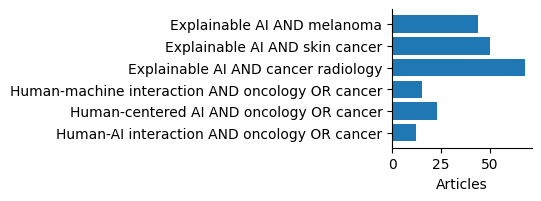

In [26]:
def plot_articles_per_query(ax,df):
    
    ylabels = df.queryFormatted
    ypos = np.arange(len(ylabels))
    ax.barh(ypos,df["nArticles"])
    ax.set_yticks(ypos,ylabels)
    ax.set_ylabel("")
    ax.set_xlabel("Articles")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 

rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize,rowSize))

df = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")] # remove the control searches
plot_articles_per_query(ax,df)

It could be interesting to show that explainable AI is on the rise, the frequency of articles should be increasing with time.

In [27]:
# test if explainable AI is in the query
qExplainable = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Explainable AI",case=False)]
print("Queries with XAI")
print(qExplainable)
dfXAIArticles= dfArticles[dfArticles.queryNo.isin(qExplainable)]

Queries with XAI
3    3
4    4
5    5
Name: queryNo, dtype: int64


In [28]:
def plot_distribution_pub_dates(ax,df,ylabel="Articles"):
    ax.hist(df['publication_date'], bins=4*4+1) # 4 years and 1 quarter
    ax.set_xlabel('Publication Date')
    ax.set_ylabel(ylabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show the dates on the x-axis, only show 2020 and 2024
    ax.set_xticks([datetime(2020,1,1),datetime(2022,1,1),datetime(2024,1,1)])
    # set the xticks labels
    ax.set_xticklabels(['2020', '2022', '2024'])
 

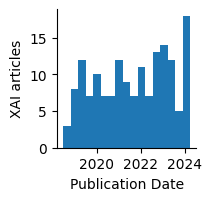

In [29]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfXAIArticles,ylabel="XAI articles")

In [30]:
qHuman = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Human-centered AI",case=False)]
print("Queries with Human-centered AI")
print(qHuman)
dfHumanArticles= dfArticles[dfArticles.queryNo.isin(qHuman)]

Queries with Human-centered AI
1    1
Name: queryNo, dtype: int64


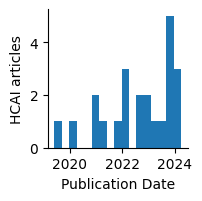

In [31]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfHumanArticles,ylabel="HCAI articles")

In [32]:
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interaction) AND ((oncology) OR (can...,Human-AI interaction AND oncology OR cancer,0,12
1,(human-centered AI) AND ((oncology) OR (cancer...,Human-centered AI AND oncology OR cancer,1,23
2,(human-machine interaction) AND ((oncology) OR...,Human-machine interaction AND oncology OR cancer,2,15
3,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,3,68
4,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,4,50
5,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,5,44


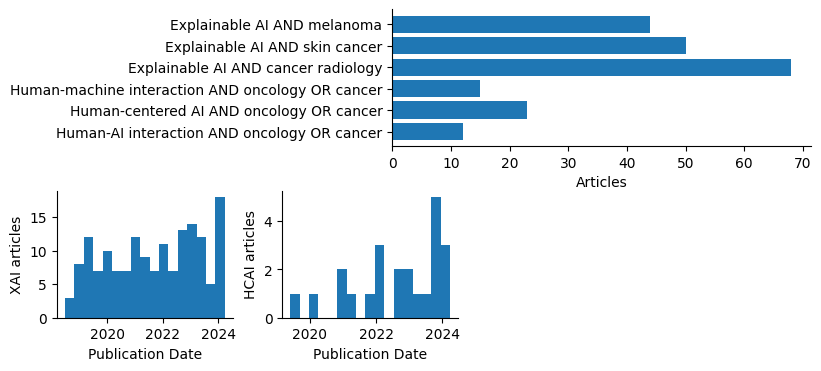

In [33]:
fig = plt.figure(figsize=(colSize*4.5, rowSize*2),constrained_layout=True)
topSpec = fig.add_gridspec(ncols=2, nrows=2, height_ratios=[0.8,1])
bottomSpec = fig.add_gridspec(ncols=4, nrows=2,  height_ratios=[1,0.7])

ax = fig.add_subplot(topSpec[0,:]) 
df = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")] # remove the control searches
plot_articles_per_query(ax,df)

ax = fig.add_subplot(bottomSpec[1,0]) 
plot_distribution_pub_dates(ax,dfXAIArticles,ylabel="XAI articles")

ax = fig.add_subplot(bottomSpec[1,1]) 
plot_distribution_pub_dates(ax,dfHumanArticles,ylabel="HCAI articles")



Create a DataFrame with unique entries for the review. Remove entries for our control searches.

In [37]:
dfArticles
q = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")].queryNo # this is used to remove the control queries
dfArticles = dfArticles[dfArticles.queryNo.isin(q)]


In [38]:
myList = []
for pubmedId in dfArticles.pubmedId.unique():
    adf = dfArticles[dfArticles.pubmedId==pubmedId]
    queryList = adf.queryNo.to_string(header=False,index=False).split('\n')
    entry = {"title":adf.title.iloc[0],
             "publication_date":adf.publication_date.iloc[0],
             #"journal":adf.journal.iloc[0],
             "pubmedId":pubmedId,
             "queryIds":queryList,
             "doi":adf.doi.iloc[0],}
    myList.append(entry)

In [39]:
dfUniqueArticles = pd.DataFrame({"title":[a["title"] for a in myList],
                         "pubmedId":[a["pubmedId"] for a in myList],
                         "publication_date":[a["publication_date"] for a in myList],
                        #"journal":[a["journal"] for a in myList],
                          "queryIds":[a["queryIds"] for a in myList],
                          "doi":[a["doi"] for a in myList]})


In [40]:
dfUniqueArticles.columns

Index(['title', 'pubmedId', 'publication_date', 'queryIds', 'doi'], dtype='object')

In [41]:
dfUniqueArticles

,title,pubmedId,publication_date,queryIds,doi
0,[Guidelines for clinical trial protocols for i...,38361499,2024-02-16,[0],10.26633/RPSP.2023.149
1,[Not Available].,38319676,2024-02-06,[0],10.1002/mp.16965
2,Artificial Intelligence-Assisted Colonoscopy i...,38146871,2023-12-26,[0],10.14309/ctg.0000000000000671
3,Covid-19 triage in the emergency department 2....,37428304,2023-07-10,[0],10.1007/s10729-023-09647-2\n10.3390/a13100249\...
4,Effect of Human-AI Interaction on Detection of...,37367443,2023-06-27,[0],10.1148/radiol.222976
...,...,...,...,...,...
175,TNF-α inhibitor reduces drug-resistance to ant...,32310956,2020-04-21,[5],10.1371/journal.pone.0231499\n10.1634/theoncol...
176,Treatment options in BRAF-mutant metastatic co...,32304411,2020-04-19,[5],10.1097/CAD.0000000000000940
177,Heterotrimeric G,32122969,2020-03-04,[5],10.1074/jbc.REV119.007061\n10.1146/annurev.bi....
178,Anticancer effects of alloxanthoxyletin and fa...,30544062,2018-12-14,[5],10.1016/j.biopha.2018.12.005


Save the results to the `results` directory

In [45]:
fn = "results/dfUniqueArticles.csv"
print("saving",fn)
dfUniqueArticles.to_csv(fn)

saving results/dfUniqueArticles.csv
